In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
import ternary
import imageio



In [14]:
absolute_path = "C:/Users/luziehel/Code/experiments_results" #"C:/Users/maler/Google Drive/Lavoro/Zuse Institute/Code/experiments_results"
experiment_folder = absolute_path + "/base"

experiment_run_folder = experiment_folder + '/52'

In [15]:
metrics_results = utils.load_metrics(experiment_run_folder)

In [16]:
agent_metric = metrics_results['AgentMetric']
n_agents = agent_metric.shape[1]
n_options = agent_metric.shape[2]
R = np.max(np.abs(agent_metric))

In [17]:
mapped_options = agent_metric/(n_options*R) + 1/n_options

# This is used to linearize the plots by sampling on every x time_steps
x = 100

In [18]:
def softmax(x,sigma=0.2):
    e = np.exp(sigma*x) 
    return e / np.sum(e)

def map_options(function, metric):
    mapped = metric.copy()
    for t in range(metric.shape[0]):
        for a in range(metric.shape[1]):
            mapped[t,a,:] = function(mapped[t,a,:])
    return mapped

mapped_options2 = map_options(softmax, agent_metric[::x, :, :])

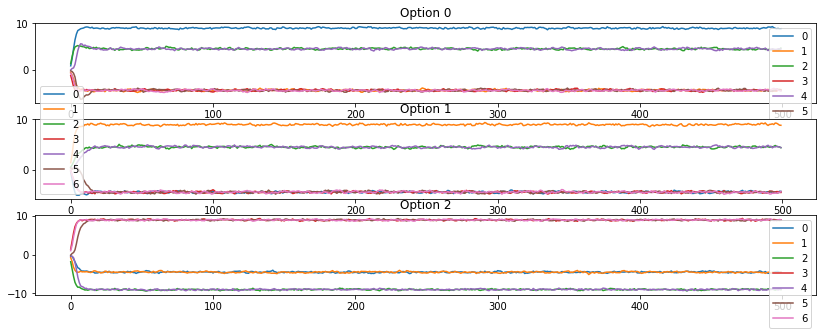

In [19]:
fig, ax = plt.subplots(n_options,1,figsize=(14, 5))
for agent in range(n_agents):
    for option in range(n_options):
        ax[option].plot(agent_metric[::x, agent, option], label=str(agent))
        ax[option].legend()
        ax[option].set_title("Option "+str(option))

C:\Users\luziehel\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


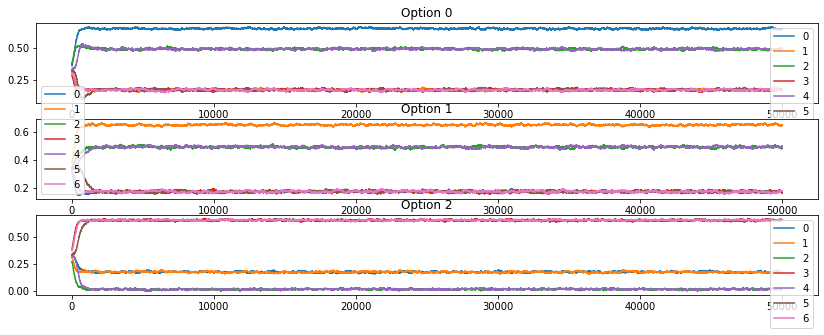

In [20]:
fig, ax = plt.subplots(n_options,1,figsize=(14, 5))
for agent in range(n_agents):
    for option in range(n_options):
        ax[option].plot(mapped_options[:, agent, option], label=str(agent))
        ax[option].legend()
        ax[option].set_title("Option "+str(option))

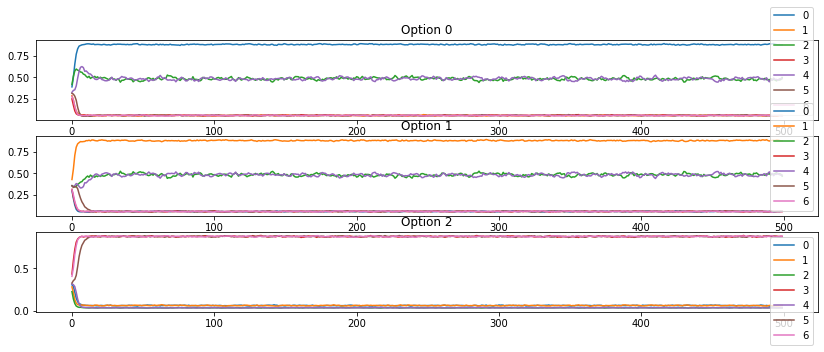

In [21]:
fig, ax = plt.subplots(n_options,1,figsize=(14, 5))
for agent in range(n_agents):
    for option in range(n_options):
        ax[option].plot(mapped_options2[:, agent, option], label=str(agent))
        ax[option].legend()
        ax[option].set_title("Option "+str(option))

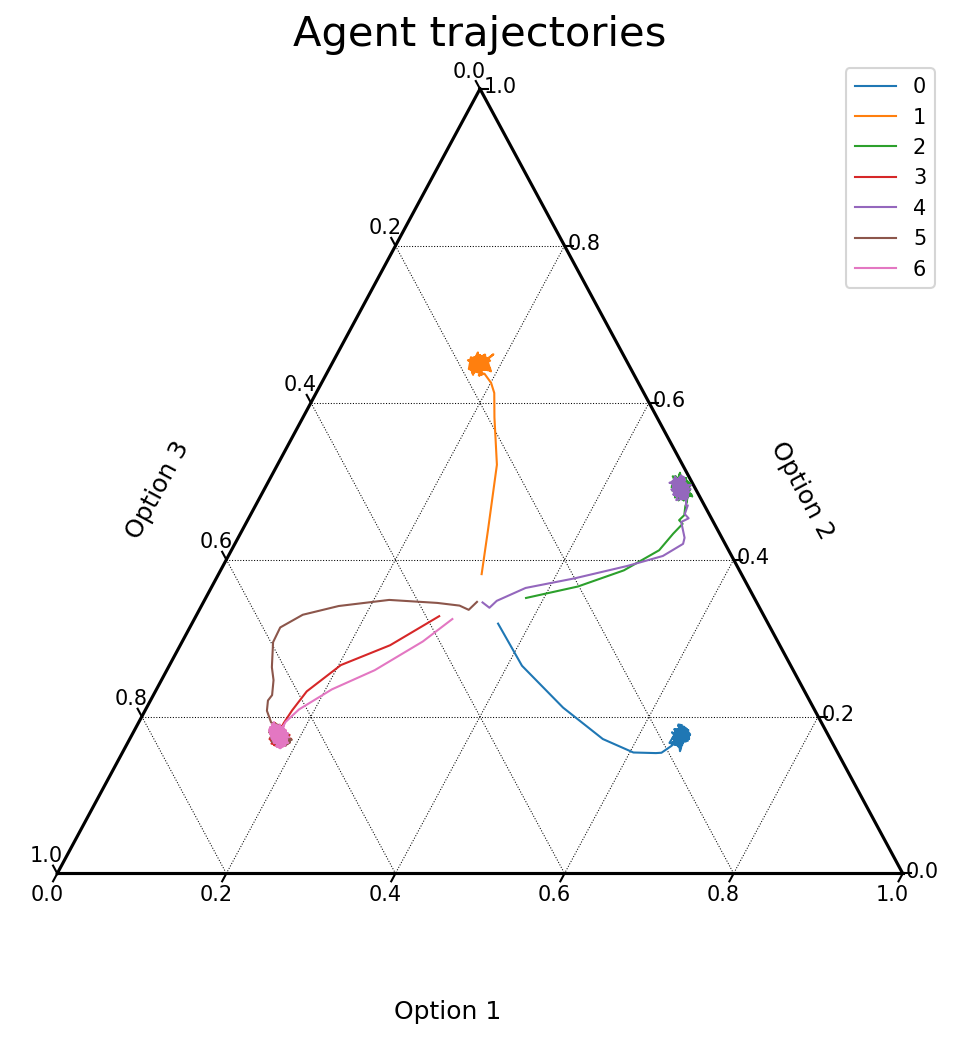

In [23]:
utils.plot_agents(mapped_options[::x,:,:])

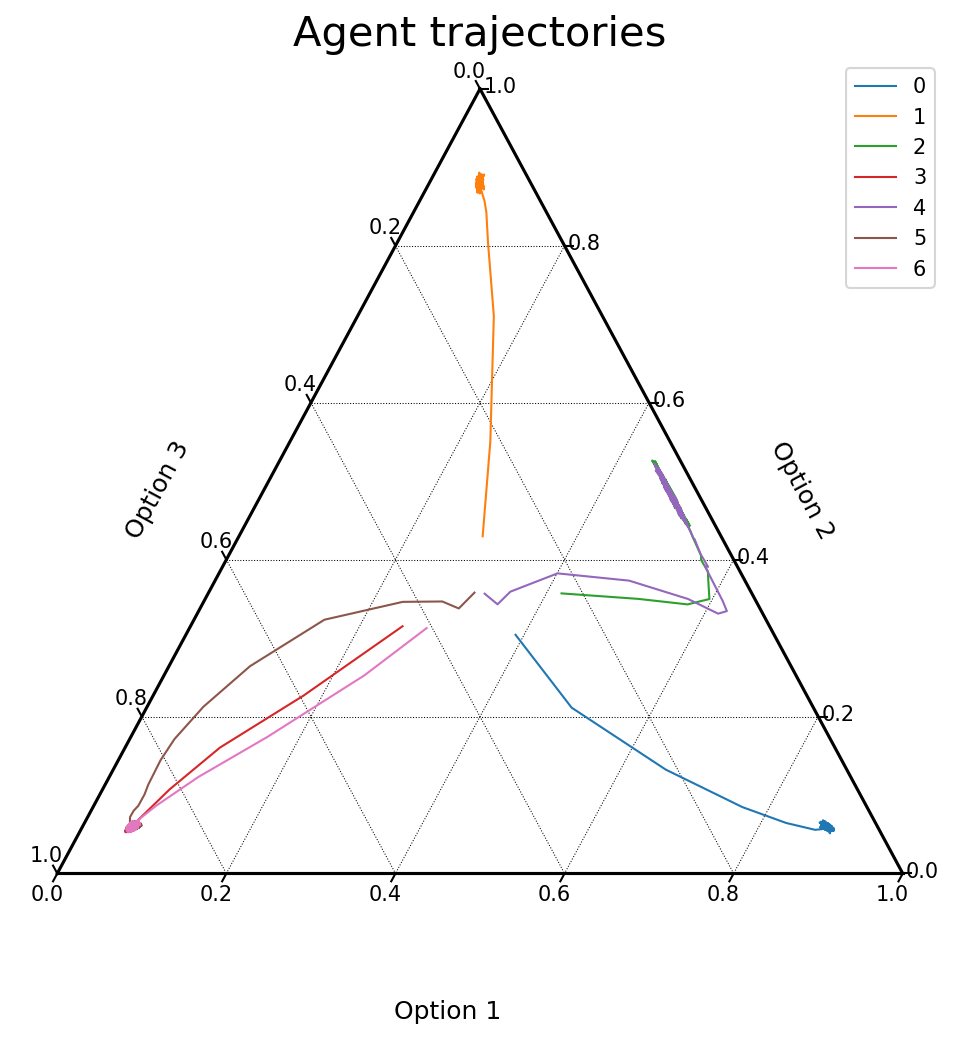

In [24]:
utils.plot_agents(mapped_options2)

In [25]:
# save_path =  "C:/Users/luziehel/Code/experiments_results/plots/"
# mapped_options = mapped_options[::, :, :]
# filenames = []
# for i in range(10, mapped_options.shape[0]- 10):
#     filename = f'{save_path}{i}.png'
#     filenames.append(filename)

#     to_plot = mapped_options[i:i+10]
    
#     utils.plot_agents(to_plot, filename)

# # build gif
# with imageio.get_writer('mygif.gif', mode='I') as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)
        
# # Remove files
# for filename in set(filenames):
#     os.remove(filename)